In [27]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EXTRACCION DE DATOS**

In [28]:
Churn_de_Clientes  = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df = pd.read_json(Churn_de_Clientes)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**INFORMACION DE LOS DATOS**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**TRANSFORMANDO COLUMNAS**

In [30]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

**DATO ALEATORIO**

In [31]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5966,8152-VETUR,No,Female,0,Yes,No,72,Yes,Yes,Two year,...,Credit card (automatic),97.70,6869.7,Fiber optic,No,Yes,No,No,Yes,Yes
4367,5989-OMNJE,No,Female,0,Yes,Yes,24,No,No phone service,One year,...,Electronic check,57.60,1367.75,DSL,Yes,Yes,Yes,No,Yes,Yes
4365,5986-WWXDV,No,Male,0,No,Yes,39,Yes,No,One year,...,Bank transfer (automatic),19.35,779.2,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2490,3473-XIIIT,Yes,Female,0,Yes,No,16,Yes,Yes,Month-to-month,...,Electronic check,100.00,1534.75,Fiber optic,No,Yes,No,No,Yes,Yes
4717,6465-GSRCL,No,Female,0,No,Yes,67,Yes,Yes,One year,...,Bank transfer (automatic),106.60,7244.7,Fiber optic,No,Yes,No,Yes,Yes,Yes
3627,5002-GCQFH,No,Male,0,Yes,No,49,Yes,Yes,Month-to-month,...,Bank transfer (automatic),93.85,4733.1,Fiber optic,Yes,Yes,No,No,Yes,No
1831,2607-DHDAK,No,Male,0,Yes,Yes,72,Yes,No,Two year,...,Credit card (automatic),19.80,1414.65,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7073,9741-YLNTD,No,Male,0,No,No,6,Yes,Yes,Month-to-month,...,Bank transfer (automatic),87.95,522.35,Fiber optic,No,No,No,Yes,No,Yes
6371,8752-IMQOS,No,Male,0,Yes,Yes,5,Yes,No,One year,...,Mailed check,20.10,85.1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2781,3858-VOBET,Yes,Male,0,No,No,23,Yes,Yes,Month-to-month,...,Electronic check,74.95,1710.45,Fiber optic,No,No,No,No,No,No


In [32]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


**PREGUNTANDO SI HAY DATOS NULOS**

In [34]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


**CHEQUEAR DUPLICADO**

In [35]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


**CAMBIANDO VARIABLE**

In [36]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [37]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


**RENOMBRANDO COLUMNAS**

In [38]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [39]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


**CREANDO NUEVA COLUMNA Y DIVIDIENDO EN 30 CADA VALOR**

In [40]:
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [41]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2856,3961-SXAXY,No,Male,0,No,No,1,Yes,No,Month-to-month,...,DSL,No,No,No,No,No,No,44.05,44.05,1.468333
6625,9107-UKCKY,No,Male,0,Yes,No,61,Yes,Yes,One year,...,DSL,No,Yes,Yes,No,Yes,Yes,4914.80,79.80,2.660000
2501,3489-VSFRD,No,Female,0,No,No,56,Yes,No,One year,...,DSL,Yes,No,Yes,Yes,No,No,3282.75,60.25,2.008333
1036,1452-UZOSF,No,Male,0,Yes,Yes,72,Yes,Yes,Two year,...,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,7548.60,106.10,3.536667
686,0971-QIFJK,No,Female,0,Yes,No,69,Yes,Yes,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1641.80,24.25,0.808333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,3916-NRPAP,No,Male,0,No,No,3,Yes,No,Month-to-month,...,Fiber optic,No,No,Yes,No,No,Yes,256.75,85.70,2.856667
758,1086-LXKFY,Yes,Female,0,Yes,Yes,1,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,No,No,69.10,69.10,2.303333
352,0511-JTEOY,Yes,Female,0,No,No,1,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,No,No,71.10,71.10,2.370000
4641,6357-JJPQT,No,Female,0,No,No,3,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,Yes,No,232.35,80.50,2.683333


**COLUMNAS ESTRICTAS QUE TIENEN QUE SER TRANSFORMADAS = "YES"/"NO"**

In [42]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


**REMPLAZAR "NO SERVICE" POR "NO" EN LA COLUMNA MULTIPLE LINES**

In [43]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


**TRANSFORMAR "YES"/"NO" A 1/0 EN MULTIPLELINES**

In [44]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [45]:
df.Contract.value_counts()


,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


**REMPLAZAR VALORES EN COLUMNA CONTRACT**

In [46]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)

    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [47]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


**COLUMNAS QUE SE TRANSFORMARAN: SI = 1, EL RESTO = 0**

In [48]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


**RECORRE CADA VALOR DE LA COLUMNA CHURN DEL DATAFRAME DF**

Si el valor es 'Yes' o 'No', lo deja igual.
Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'.

In [49]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [50]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [51]:
df.to_json('Churn_de_Clientes.json', index= False)

**CARGA Y ANALISIS**

In [52]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

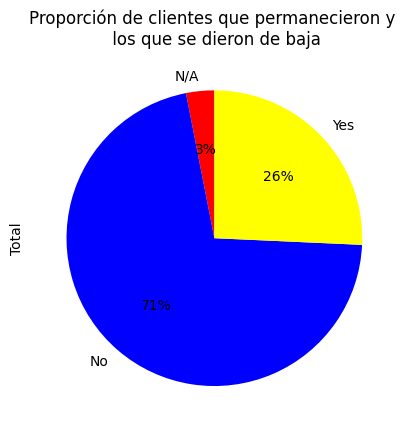

<Figure size 640x480 with 0 Axes>

In [56]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'blue','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

**ANALIZAMOS Y CREAMOS UN GRAFICO DE RECUENTO DE EVASION POR VARIABLES CATEGORICAS**

In [57]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


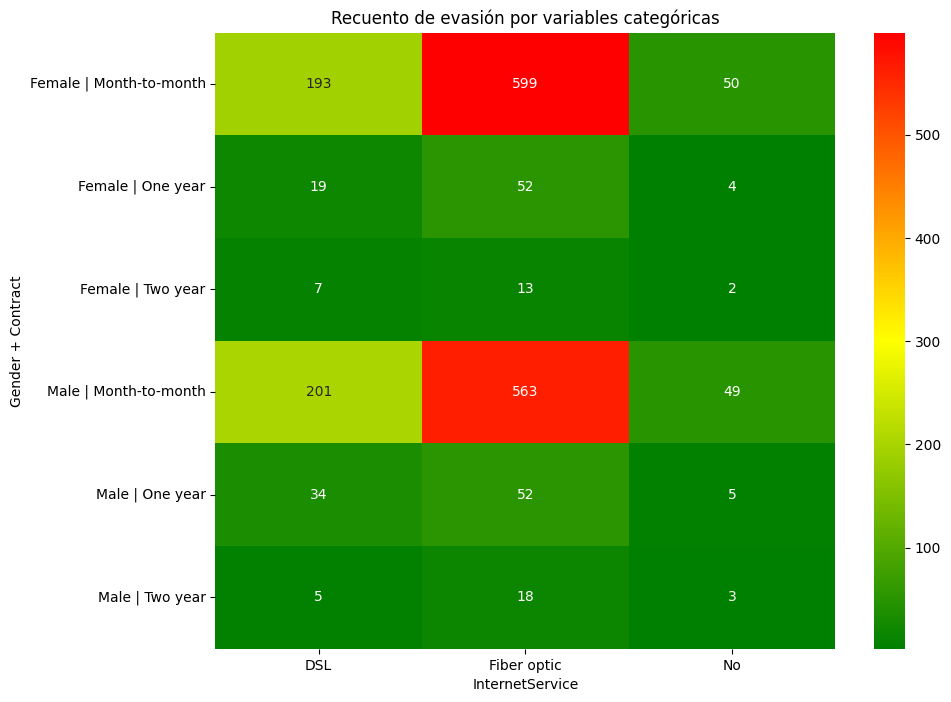

In [58]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["green", "yellow", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

In [59]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


**CONTEO DE EVASION POR VARIABLE NUMERICA**

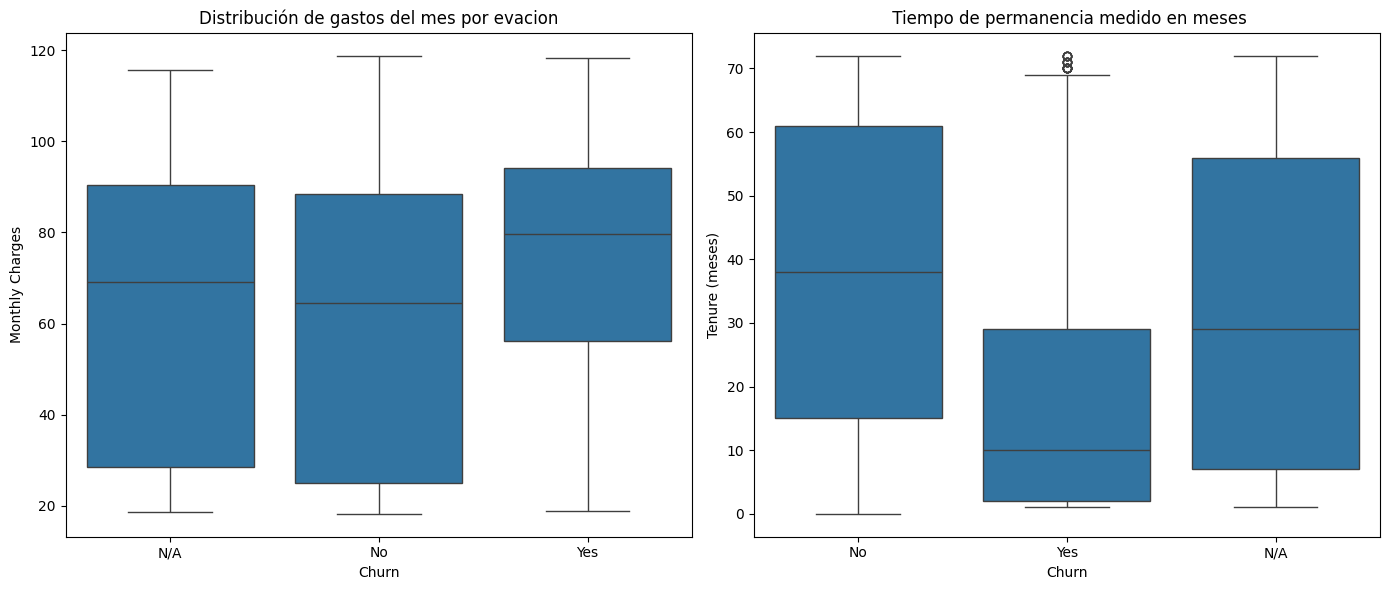

In [60]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

**Informe final**

🧾 Informe de ETL y Análisis Exploratorio – Churn de Clientes - Telecom X

1. **Extracción**

Fuente de datos:

python Copy Edit Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'


 2. **Transformación (T - Transform)**

 a) Normalización de estructuras anidadas Columnas anidadas (customer, phone, account, internet) fueron normalizadas y fusionadas con el DataFrame principal.


 b) Limpieza de datos
Se detectaron 0 valores nulos y 0 duplicados en customerID.


Se convirtieron columnas de tipo object a float (como Charges.Total y Charges.Monthly).


Se eliminaron las columnas originales luego de la transformación.

 c) Renombrado y creación de nuevas variables
Renombrado de columnas claves como: 'gender' → 'Gender', 'tenure' → 'Tenure', 'customerID' → 'CustomerID'.

Se creó la columna DailyCharges dividiendo el gasto mensual por 30.

 d) Transformación de variables categóricas
Columnas binarias convertidas a 1/0: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines'].

Otras como 'OnlineSecurity', 'TechSupport', etc., también transformadas a binario.

'Contract' fue mapeada numéricamente (Month-to-month → 1, etc.).

Churn se estandarizó para tener solo valores 'Yes' o 'No'.

 3. **Carga (L - Load)**

El DataFrame procesado se guardó como: Churn_de_Clientes.json

python Copy Edit df.to_json('Churn_de_Clientes.json', index=False)


 **Análisis Exploratorio**

 Proporción de clientes que abandonaron Se generó un gráfico tipo torta mostrando que una proporción significativa de clientes se dio de baja.

 Análisis de clientes que abandonaron

 Recuento por género, contrato e internet
Se construyó una tabla y heatmap:

Eje X: InternetService

Eje Y: Gender + Contract

Colores tipo semáforo (verde → bajo, rojo → alto)

 **Visualización:**

python Copy Edit sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)

  Análisis por variables numéricas a) Cargos mensuales (Monthly Charges) Clientes que se dieron de baja tienden a tener gastos mensuales más altos.

b) Tiempo de permanencia (Tenure) Clientes que permanecen tienen un tenure significativamente mayor.

Gráficos:

Boxplots para ChargesMonthly y Tenure comparando Churn.

📌 **Conclusión**

1. Los clientes con contratos de corta duración, tarifas mensuales altas y poca permanencia en la empresa presentan una mayor probabilidad de cancelar el servicio. Este hallazgo inicial es clave para desarrollar modelos de predicción de abandono y diseñar estrategias de fidelización más efectivas.

2. El tipo de conexión a internet también tiene un impacto significativo: aquellos usuarios que utilizan tecnologías como DSL o que no cuentan con servicios adicionales de seguridad (como OnlineSecurity o TechSupport) se encuentran más representados entre los que deciden dejar la compañía.